In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv(r"C:\Users\imreh\Desktop\Tech-Intern Internship\heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


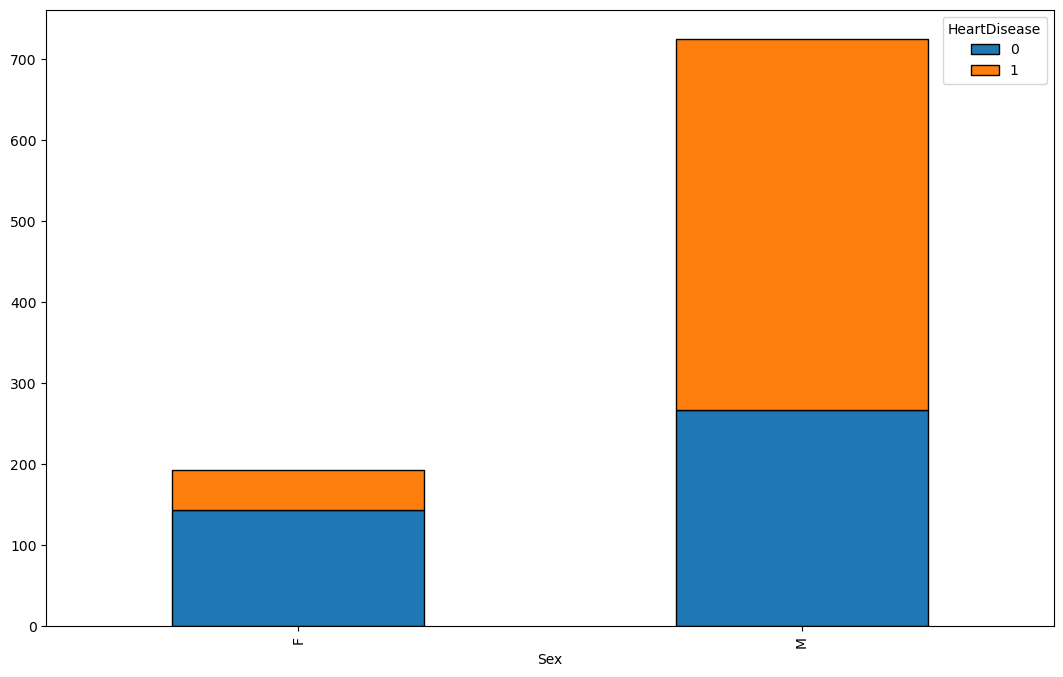

In [5]:
state_cmp=df.groupby(['Sex','HeartDisease']).size().unstack()
state_cmp.plot.bar(stacked=True,figsize=(13,8),edgecolor='black')
plt.show()
#Below chart shows females have lower risk of heart diseases compared to males.

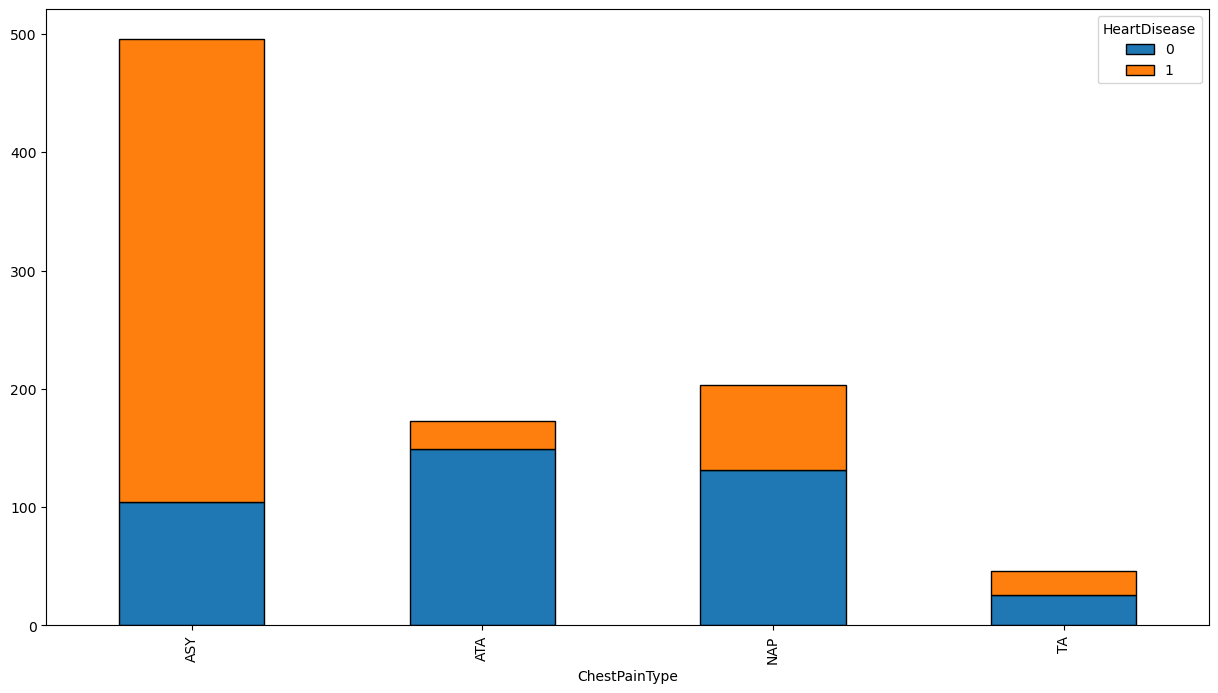

In [6]:
chst=df.groupby(['ChestPainType','HeartDisease']).size().unstack()
chst.plot.bar(stacked=True,figsize=(15,8),edgecolor='black')
plt.show()

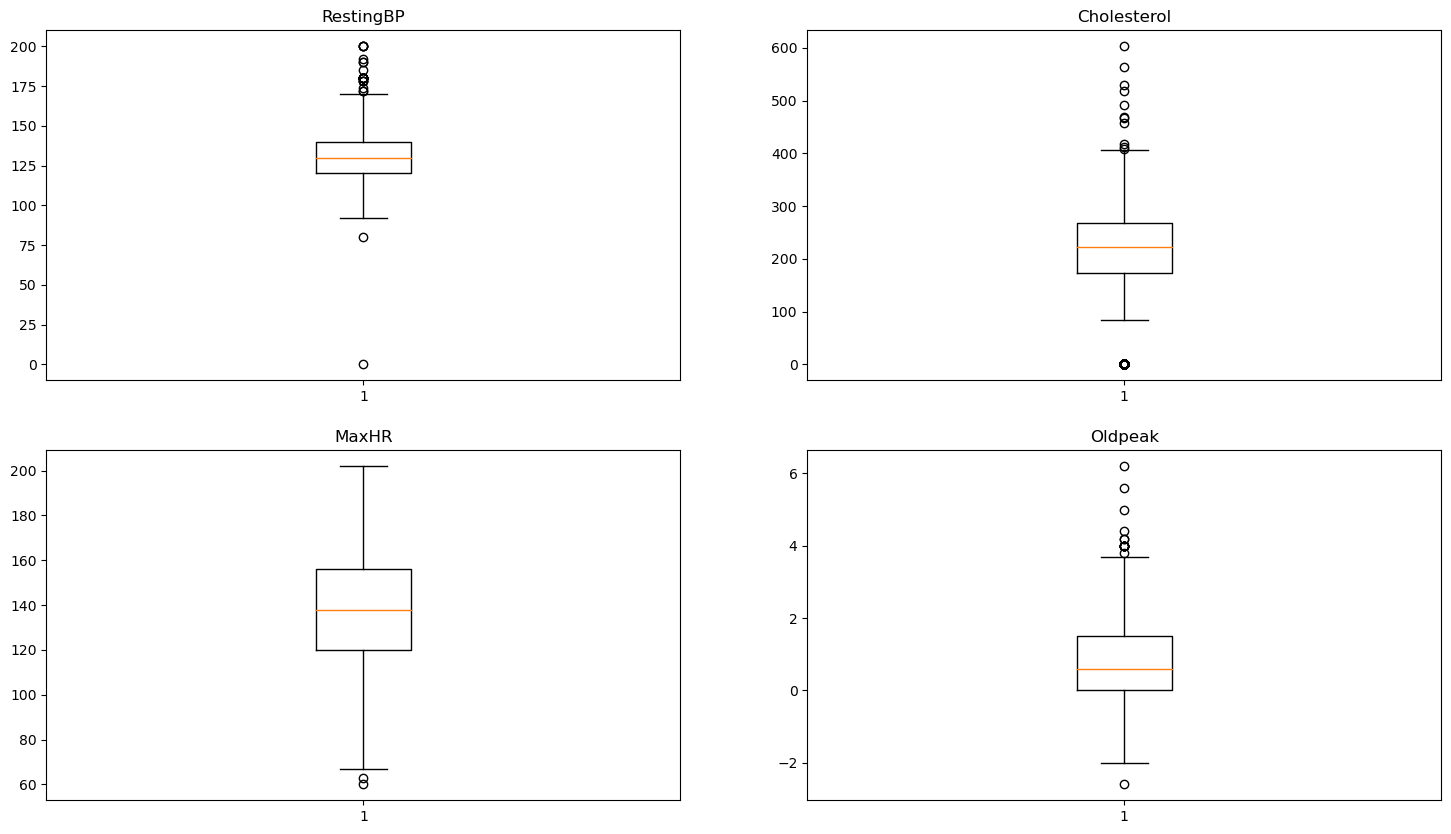

In [7]:
#Lets check boxplot and detect outliers.
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.title('RestingBP')
plt.boxplot(df['RestingBP'])
plt.subplot(2,2,2)
plt.title('Cholesterol')
plt.boxplot(df['Cholesterol'])
plt.subplot(2,2,3)
plt.title('MaxHR')
plt.boxplot(df['MaxHR'])
plt.subplot(2,2,4)
plt.title('Oldpeak')
plt.boxplot(df['Oldpeak'])
plt.show()

In [8]:
#for time being,remove only record with 0 RestingBP .
df = df[df['RestingBP']>0]

In [9]:
#Many records with cholesterol = 0.looks like these are missing values.Lets try to fill them with mean value
df['Cholesterol'] = df['Cholesterol'].apply(lambda x : 244.6 if x == 0 else x)

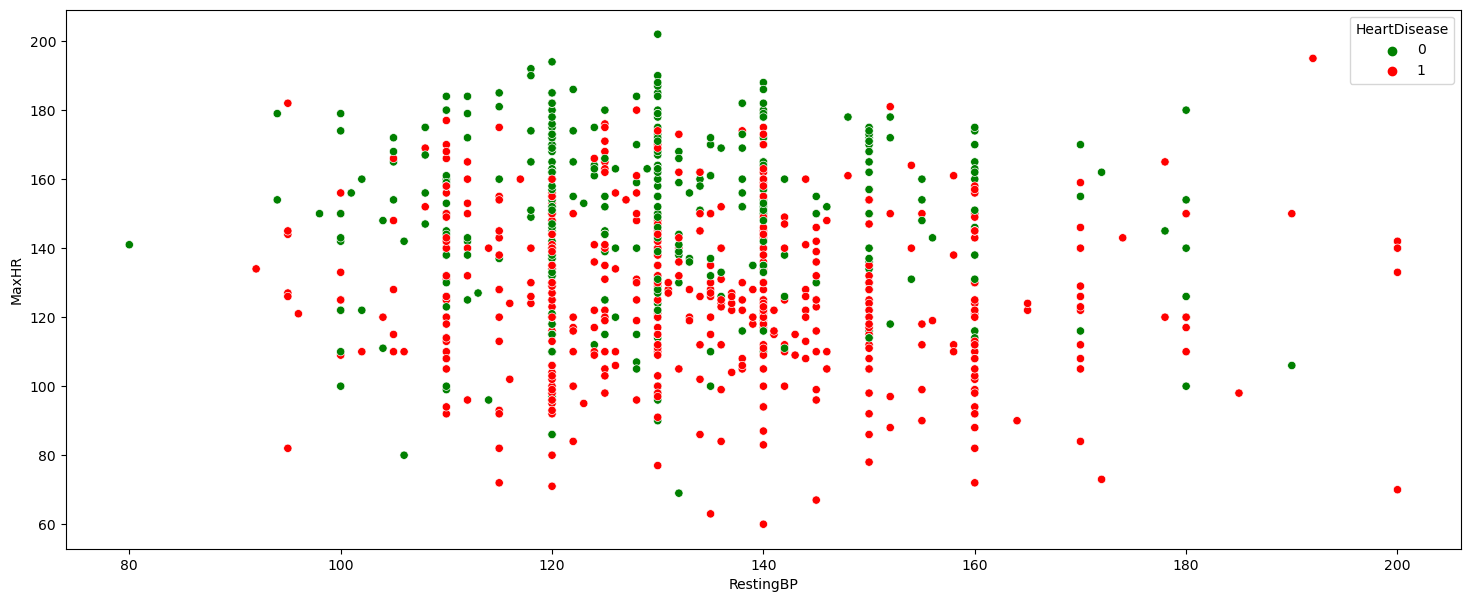

In [10]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='RestingBP',y='MaxHR',data=df,hue='HeartDisease',palette=['green','red'])
plt.show()
#if MaxHR value is lower,there are more chances of heart disease.

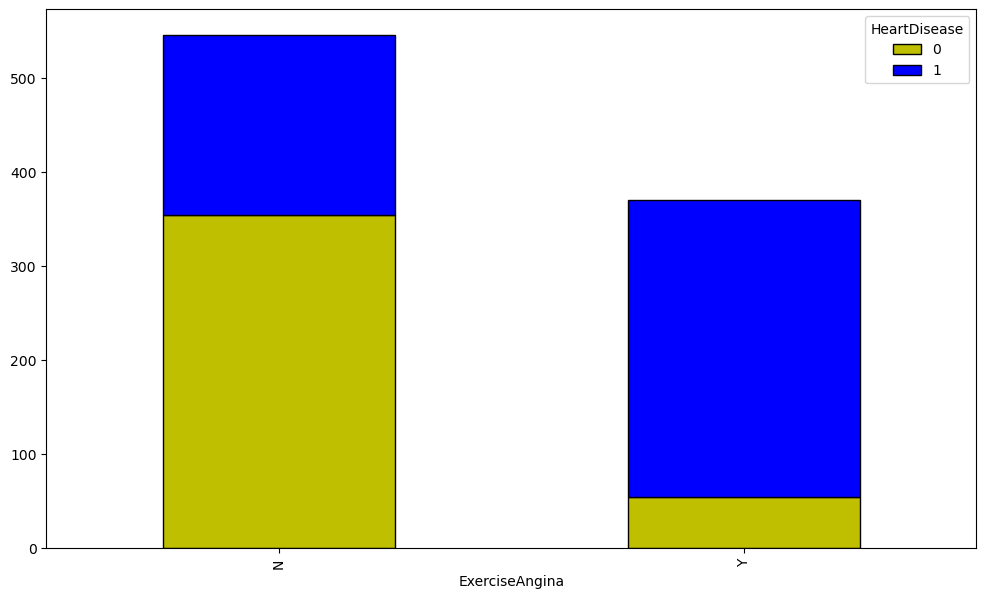

In [11]:
rest=df.groupby(['ExerciseAngina','HeartDisease']).size().unstack()
rest.plot.bar(stacked=True,figsize=(12,7),color=['y','b'],edgecolor='black')
plt.show()
#ExerciseAngina = Y creates high chances of heart disease.

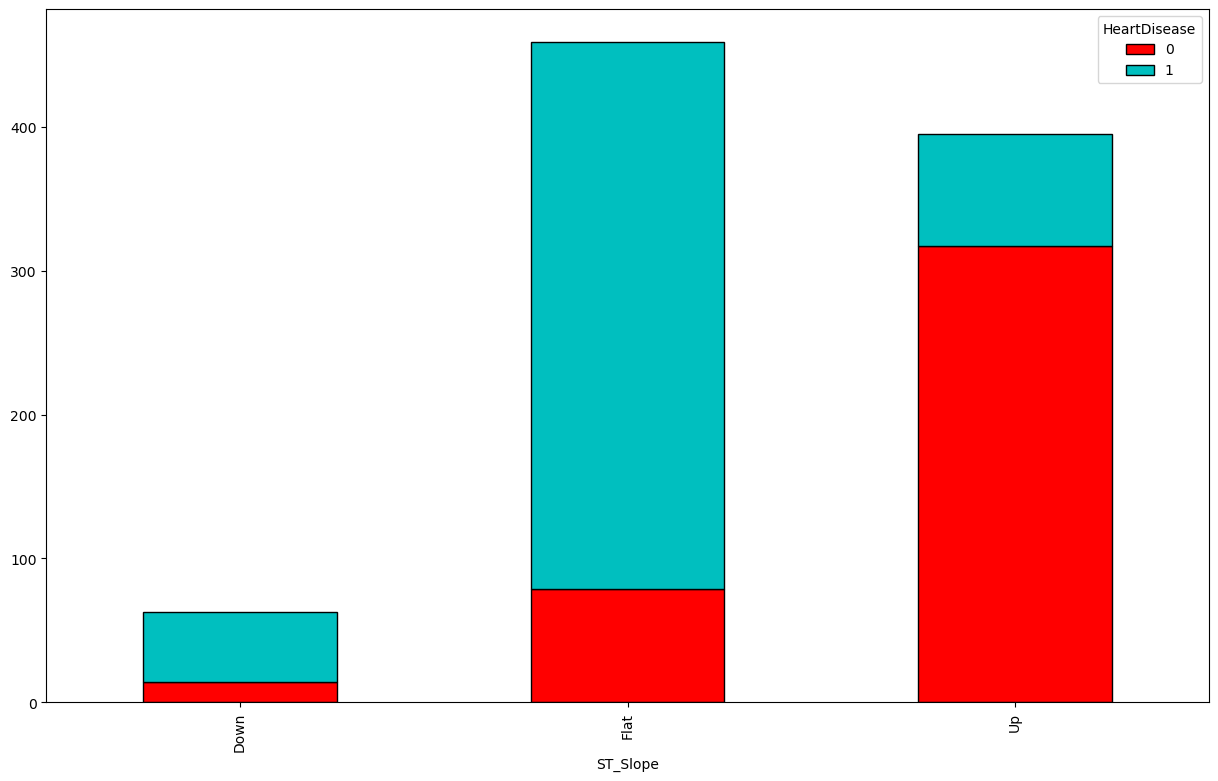

In [12]:
ST=df.groupby(['ST_Slope','HeartDisease']).size().unstack()
ST.plot.bar(stacked=True,figsize=(15,9),color=['r','c'],edgecolor='black')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
 11  HeartDisease    917 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.1+ KB


In [14]:
#We analysed impact of columns on heart disease.Now convert object columns to numeric .
df['Sex'] = df['Sex'].apply(lambda x : 1 if x == 'M' else 0)
df['ExerciseAngina'] = df['ExerciseAngina'].apply(lambda x : 1 if x == 'Y' else 0)

In [15]:
#use mapping method for ST_slope column conversion
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['ChestPainType'] = lb.fit_transform(df['ChestPainType'])
df['RestingECG'] = lb.fit_transform(df['RestingECG'])
t = {'Down':0,'Flat':1,'Up':2}
df['ST_Slope'] = df['ST_Slope'].map(t)

In [16]:
X= df.drop('HeartDisease',axis=1)
Y = df.HeartDisease
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state = 50)

In [17]:
#Lets use Decision tree algo on given dataset.
#Hyperparameter tuning code is not included here as it takes time for execution.
classifier = DecisionTreeClassifier(max_depth = 5,criterion='entropy',min_samples_leaf=3,splitter='random',class_weight='balanced')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
y_ptrain = classifier.predict(x_train)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       128
           1       0.83      0.89      0.86       148

    accuracy                           0.84       276
   macro avg       0.85      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276



In [19]:
print(classification_report(y_train,y_ptrain))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85       282
           1       0.86      0.94      0.90       359

    accuracy                           0.88       641
   macro avg       0.89      0.87      0.88       641
weighted avg       0.88      0.88      0.88       641



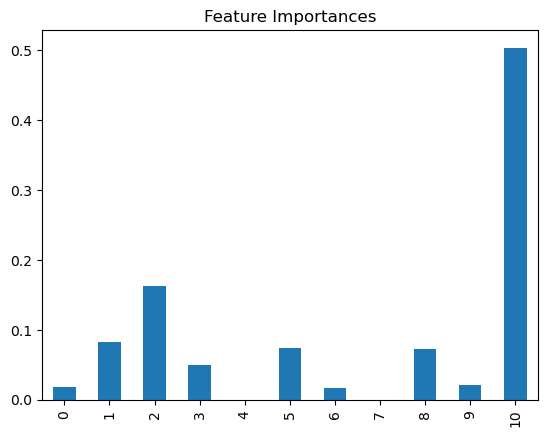

In [20]:
F = pd.Series(classifier.feature_importances_)
F.plot(kind='bar', title='Feature Importances')
plt.show()

In [21]:
#Conclusion : Decision Tree classifier gives accuracy of 84%.
#Lets try using xgboost algorithm for improving accuracy.

In [22]:
xg = XGBClassifier(max_depth=3,n_estimators=10,learning_rate=0.9,subsample=0.7,min_child_weight=0.25,gamma=1,colsample_bytree=0.7,scale_pos_weight=1)
xg.fit(x_train,y_train)
print(xg.score(x_train,y_train))
print(xg.score(x_test,y_test))

0.9235569422776911
0.8768115942028986


In [23]:
y_predtest = xg.predict(x_test)
y_ptest = xg.predict(x_train)
print(classification_report(y_test,y_predtest))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       128
           1       0.89      0.88      0.88       148

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



In [24]:
print(classification_report(y_train,y_ptest))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       282
           1       0.91      0.96      0.93       359

    accuracy                           0.92       641
   macro avg       0.93      0.92      0.92       641
weighted avg       0.92      0.92      0.92       641



<AxesSubplot:title={'center':'Feature Importances'}>

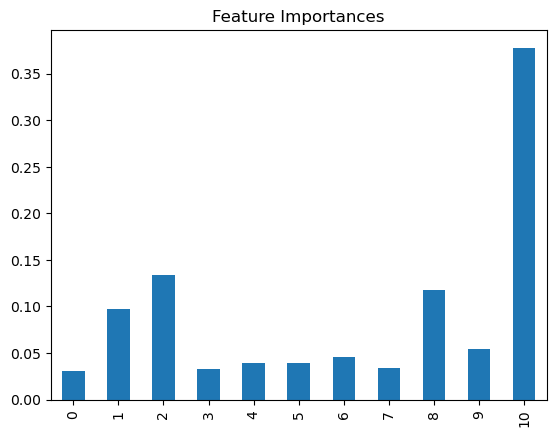

In [25]:
feat_imp = pd.Series(xg.feature_importances_)
feat_imp.plot(kind='bar', title='Feature Importances')